In [2]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import json

In [3]:
# df = pd.read_json("tagged_production.json")
# df_all = pd.read_json("production.json")
# d = pd.read_json("tagged_production.json")

# df_tag = pd.read_json("prod_test.json")
d_tag = pd.read_json("tagged_prod_test.json")

In [335]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [411]:
d_tag.loc[d_tag.questType.isin(["Relative Clause", "Embedded Question"])].sentence

35     Could you tell me what museums are near this restaurant?              
48     Do you know where the best museums are located around here?           
79     Do you know which restaurant serves the best italian food around here?
94     Do we know how many tenants are home?                                 
123    Do any of you have an idea of where they are?                         
132    Do we know the location of where the hostages are being held?         
137    Can you find where they are being held?                               
164    Do you know where the best coffee shops that sell espresso are?       
168    Do you know where to find coffee shops                                
181    Can you tell me what yoga studios are in the area?                    
283    Do you know where any woodworking stores are around here?             
286    Do you know where any local woodworking shops are around here?        
297    Can you point me to where some woodworking shops are?    

In [415]:
eq = d_tag.loc[d_tag.questType.isin(["Relative Clause", "Embedded Question"])]

In [422]:
eq_h = eq.loc[eq.stakes.isin(["high"])] # len = 4
eq_l = eq.loc[eq.stakes.isin(["low"])] # len = 11

In [423]:
len(eq_h)

4

In [417]:
eq.groupby(["clauseType","stakes","mat_verb"])["clauseType"].count()

clauseType  stakes  mat_verb
Finite      high    find        1
                    have        1
                    know        2
            low     know        6
                    point       1
                    tell        2
Modal       low     know        1
Non-Finite  low     know        1
Name: clauseType, dtype: int64

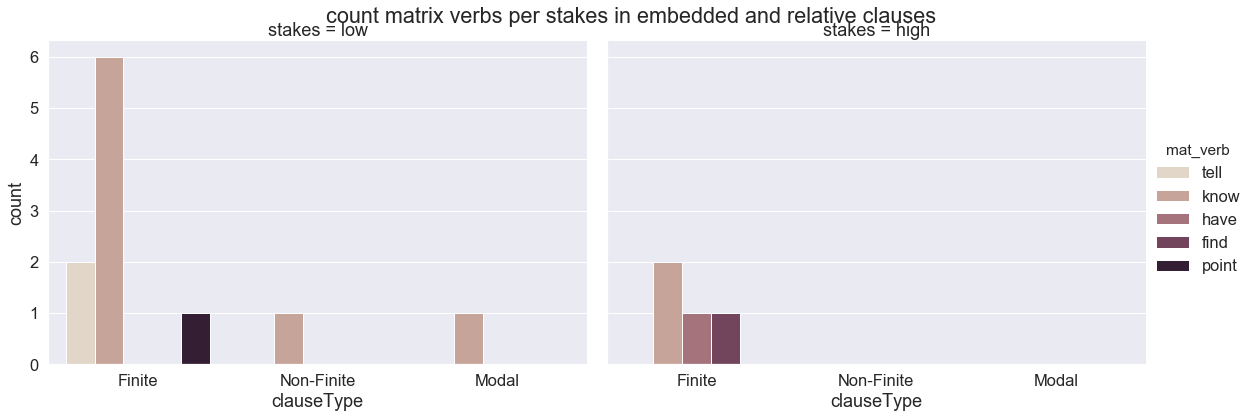

In [507]:
g = sns.catplot(x="clauseType", kind="count",col="stakes", hue="mat_verb", palette="ch:.25", height=6, aspect=8/6, data=eq)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('count matrix verbs per stakes in embedded and relative clauses')
plt.show()

In [23]:
# seaborn palette seagreens and blues
# sns.set_palette(sns.cubehelix_palette(5, start=.75, rot=-.75))

In [389]:
p = d_tag.pivot_table(index=['questType', 'clauseType'], values='sentence', aggfunc=len).groupby(['questType']).sentence.transform(lambda x: x/sum(x)).reset_index()

In [393]:
d_tag.groupby(['questType', 'clauseType'])["questType"].count()

questType          clauseType
Embedded Question  Finite        11 
                   Modal         1  
                   Non-Finite    1  
Relative Clause    Finite        2  
Root Question      Finite        315
                   Modal         27 
Name: questType, dtype: int64

In [395]:
len(d_tag)

357

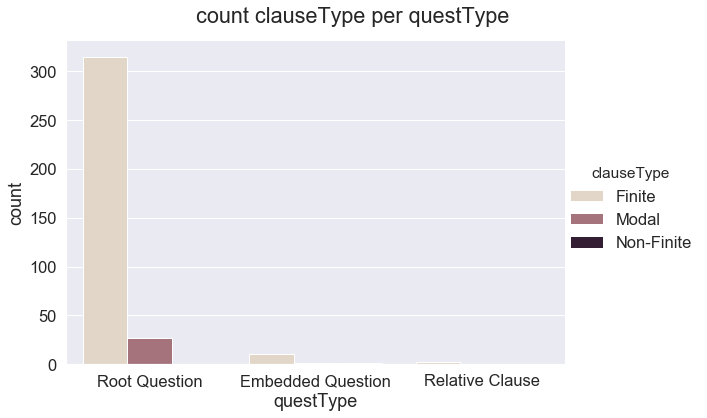

In [508]:
# fig_dims = (10, 8)
# fig, ax = plt.subplots(figsize=fig_dims)

g = sns.catplot(x="questType", kind="count", hue="clauseType", palette="ch:.25", height=6, aspect=8/6, data=d_tag)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('count clauseType per questType')
# g.set_xticklabels(rotation=45)
plt.show()

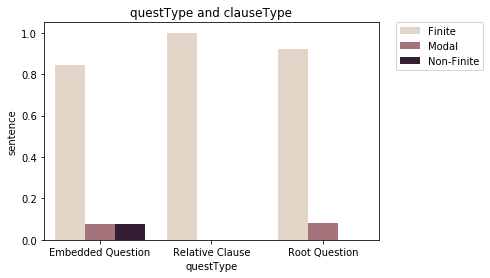

In [392]:
# proportion
g = sns.barplot(x="questType",y="sentence", hue="clauseType", palette="ch:.25", data=p)
g.set_title("questType and clauseType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

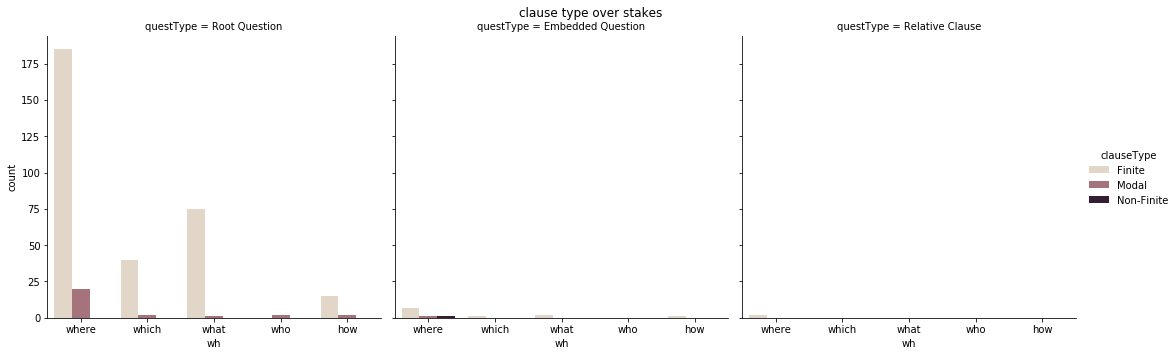

In [36]:
# count
g = sns.catplot(x="wh", kind="count",hue="clauseType", col="questType", palette="ch:.25", data=d_tag)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('clause type over stakes')
plt.show()

In [492]:
# proportion relative to clauseType
t = d_tag.pivot_table(index=['clauseType', 'stakes'], values='sentence', aggfunc=len).groupby(['stakes'], as_index=False).sentence.transform(lambda x: x/sum(x)).reset_index()

In [498]:
tt = d_tag.pivot_table(index=['clauseType', 'stakes'], values='sentence', aggfunc=len).groupby(['stakes'], as_index=False).sentence.transform(lambda x: x/len(d_tag)).reset_index()

In [385]:
# what is that one non-finite sentence?
d_tag.loc[d_tag.clauseType.isin(["Non-Finite"])].sentence

168    Do you know where to find coffee shops 
Name: sentence, dtype: object

In [365]:
d_tag.groupby(["clauseType","stakes"])["stakes"].count()

clauseType  stakes
Finite      high      172
            low       156
Modal       high      11 
            low       17 
Non-Finite  low       1  
Name: stakes, dtype: int64

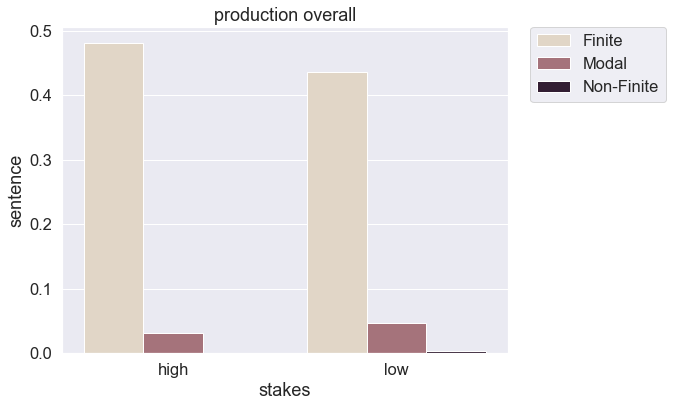

In [502]:
# proportion relative to stakes

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="stakes", y="sentence",hue="clauseType", palette="ch:.25", data=tt)
g.set_title("production overall")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

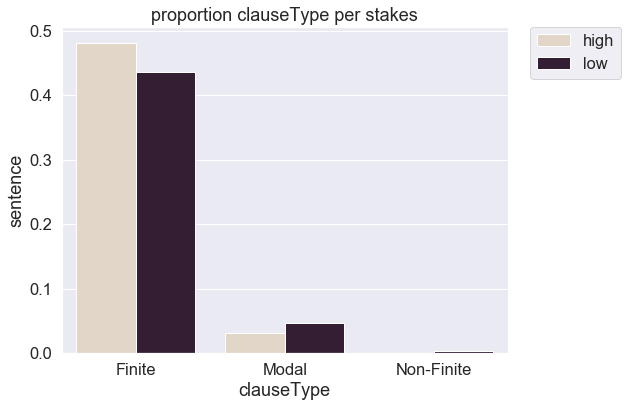

In [503]:
# proportion relative to clauseType
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="clauseType", y="sentence",hue="stakes", palette="ch:.25", data=tt)
g.set_title("proportion clauseType per stakes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

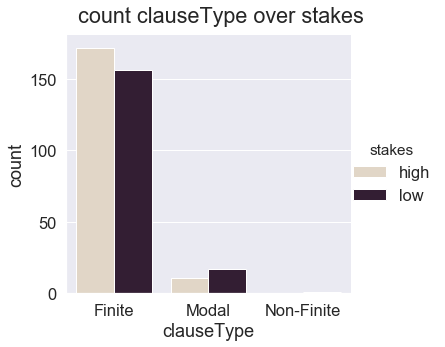

In [495]:
g = sns.catplot(x="clauseType", kind="count", hue="stakes", palette="ch:.25", data=d_tag)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('count clauseType over stakes')
plt.show()

## Looking at WH-word

In [370]:
wh = d_tag.pivot_table(index=['wh','stakes'], values='sentence', aggfunc=len).groupby(['wh'], as_index=False).sentence.transform(lambda x: x/sum(x)).reset_index()

In [373]:
d_tag.groupby(['wh','stakes'])['wh'].count()

wh     stakes
how    high      16 
       low       2  
what   high      31 
       low       47 
where  high      99 
       low       117
which  high      35 
       low       8  
who    high      2  
Name: wh, dtype: int64

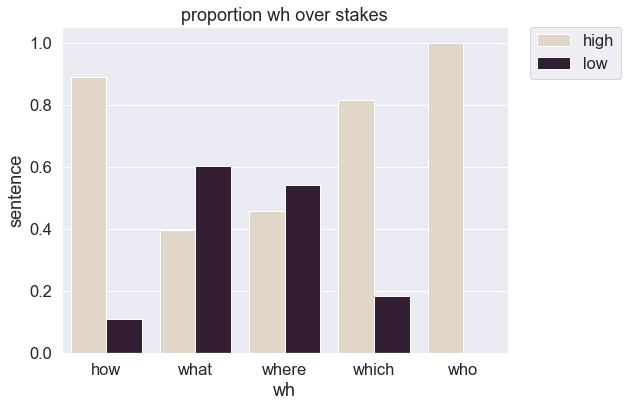

In [504]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(x="wh", y="sentence",hue="stakes", palette="ch:.25", data=wh)
g.set_title("proportion wh over stakes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### D-linking

1. Are there differences in d-linking across stakes? --> YES
2. Are there differences in plural vs. singular NPs? --> NO
3. Are there differences between 'what' and 'which'? --> NO

In [424]:
dl = d_tag.loc[d_tag.wh.isin(["which", "what"])]

In [425]:
len(dl)

121

In [433]:
# First split the column wh_v1 into multiple columns to look at d-linking
houx = dl.wh_v1.apply(pd.Series).merge(dl, left_index = True, right_index = True)
# split the column with the NNS
houxx = houx[1].apply(pd.Series).merge(houx, left_index = True, right_index = True)

# subset to the ones where the value is "NNS"
nns = houxx.loc[houxx["1_x"].isin(["NNS"])]

In [439]:
len(nns)/len(dl)*100

44.62809917355372

In [459]:
n = nns.pivot_table(index=['wh','stakes','0_x'], values='sentence', aggfunc=len).groupby(['stakes'], as_index=False).sentence.transform(lambda x: x).reset_index()
n = n.rename(columns={'0_x': "Noun", 'sentence': 'count'})

In [460]:
n

,wh,stakes,Noun,count
0,what,high,apartments,1
1,what,high,areas,1
2,what,high,floors,1
3,what,high,locations,3
4,what,high,neighborhoods,1
5,what,high,offices,5
6,what,high,restaurants,1
7,what,high,stores,8
8,what,low,museums,1
9,what,low,places,1


In [471]:
n.groupby(["stakes"])["stakes"].count()

stakes
high    16
low     3 
Name: stakes, dtype: int64

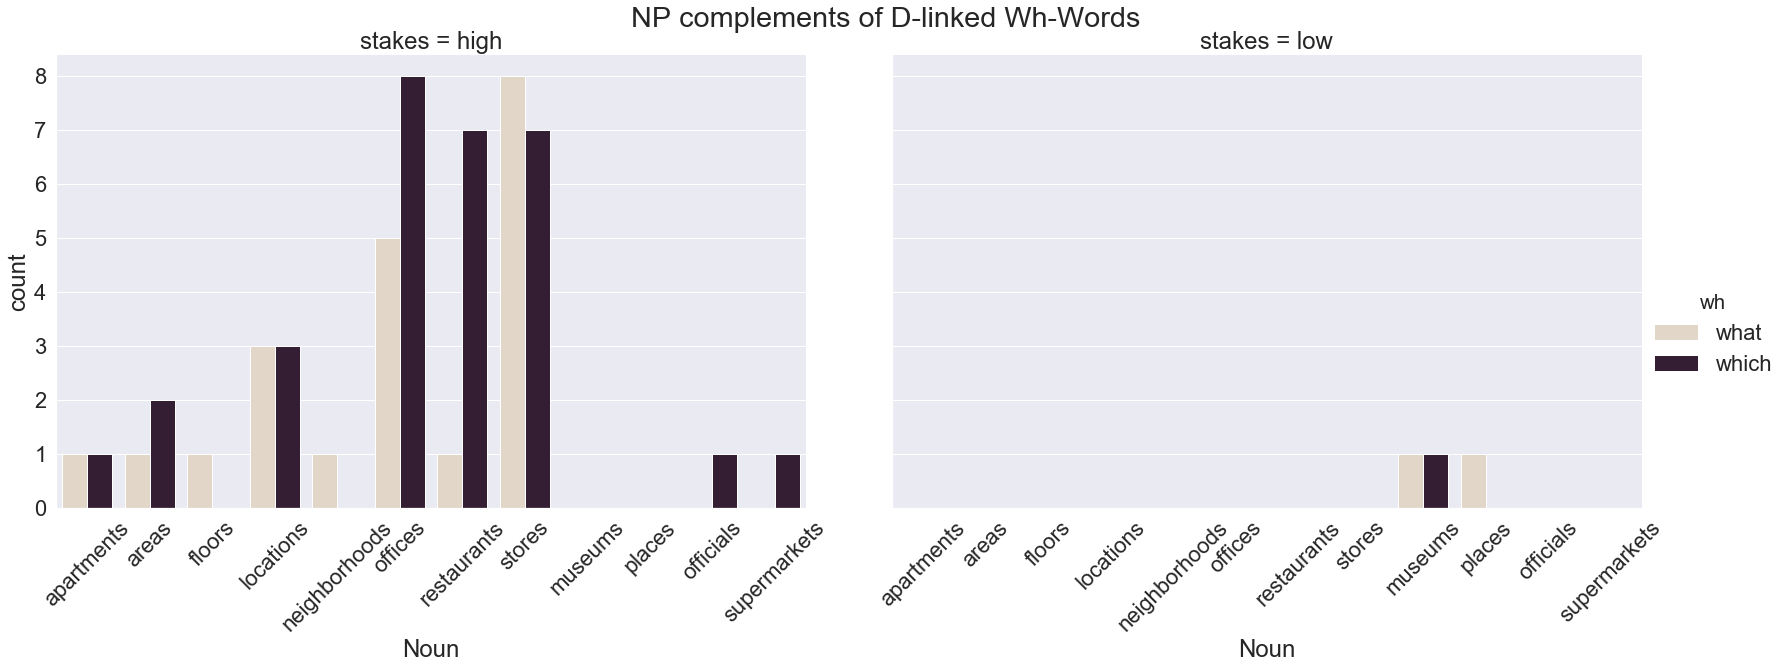

In [468]:
sns.set(font_scale=2)

g = sns.catplot(x="Noun", y="count", hue="wh", col="stakes", kind="bar", palette="ch:.25", height=8.27, aspect=11.7/8.27, data=n)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('NP complements of D-linked Wh-Words')
g.set_xticklabels(rotation=45)
plt.show()

# Looking at "Extra" cue words

In [341]:
all = d_tag.loc[d_tag["sentence"].str.contains("all")]
some = d_tag.loc[d_tag["sentence"].str.contains("some")]
close = d_tag.loc[d_tag["sentence"].str.contains("close")]
can = d_tag.loc[d_tag["sentence"].str.contains("can")]
local = d_tag.loc[d_tag["sentence"].str.contains("local")]
near = d_tag.loc[d_tag["sentence"].str.contains("near")]
best = d_tag.loc[d_tag.sentence.str.contains("best")]
around = d_tag.loc[d_tag.sentence.str.contains("around")]
fav = d_tag.loc[d_tag.sentence.str.contains("favorite")]
good = d_tag.loc[d_tag["sentence"].str.contains("good")]
suggest = d_tag.loc[d_tag["sentence"].str.contains("suggest")]
every = d_tag.loc[d_tag["sentence"].str.contains("every")]
common = d_tag.loc[d_tag["sentence"].str.contains("common")]

In [342]:
len(common)

0

In [343]:
words = [all, some, close, can, local, near, best, around, fav, good, suggest]
names = ['all', 'some', 'close', 'can', 'local', 'near', 'best', 'around', 'favorite', 'good', 'suggest']

In [344]:
# this one is for proportions
def good_melt(w,n):
    a = w.pivot_table(index=['stakes'], values='sentence', aggfunc=len).groupby(["stakes"], as_index=False).sentence.transform(lambda x: x/len(d_tag)).reset_index()
    a = a.rename(columns={'sentence': n})
    a = pd.melt(a, id_vars=["stakes"], var_name="word", value_name='proportion')
    return pd.DataFrame(a)

appended = []
for (w,n) in zip(words,names):
    appended.append(good_melt(w,n))

final = pd.concat(appended)

In [380]:
good.pivot_table(index=['stakes'], values='sentence', aggfunc=len).groupby(["stakes"], as_index=False).sentence.transform(lambda x: x).reset_index()

,stakes,sentence
0,low,20


In [382]:
#  get the counts
def good_melt(w,n):
    a = w.pivot_table(index=['stakes'], values='sentence', aggfunc=len).groupby(["stakes"], as_index=False).sentence.transform(lambda x: x).reset_index()
    a = a.rename(columns={'sentence': n})
    a = pd.melt(a, id_vars=["stakes"], var_name="word", value_name='count')
    return pd.DataFrame(a)

appended = []
for (w,n) in zip(words,names):
    appended.append(good_melt(w,n))

final_counts = pd.concat(appended)

In [383]:
final_counts

,stakes,word,count
0,high,all,10
0,low,some,13
0,high,close,3
1,low,close,14
0,high,can,3
1,low,can,16
0,high,local,1
1,low,local,6
0,high,near,2
1,low,near,28


In [377]:
final

,stakes,word,proportion
0,high,all,0.028011
0,low,some,0.036415
0,high,close,0.008403
1,low,close,0.039216
0,high,can,0.008403
1,low,can,0.044818
0,high,local,0.002801
1,low,local,0.016807
0,high,near,0.005602
1,low,near,0.078431


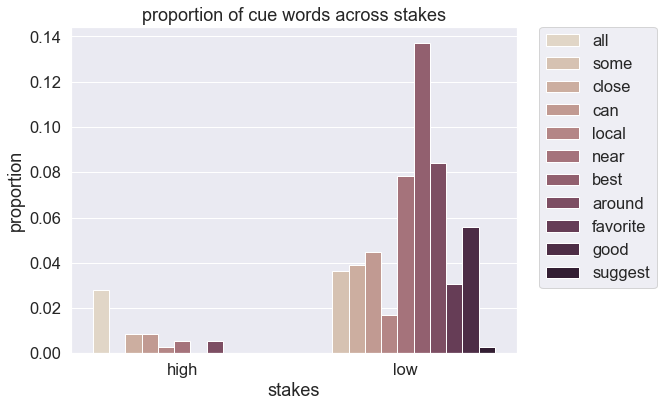

In [476]:
# proportion absolute to words
sns.set(font_scale=1.5)
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(x="stakes",y="proportion", hue="word", palette="ch:.25", data=final)
g.set_title("proportion of cue words across stakes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# g.set_xticklabels(rotation=45)
plt.show()

## RELATIVE PROPORTIONS

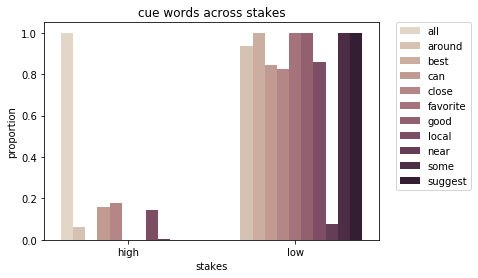

In [272]:
# proportion relative to words
g = sns.barplot(x="stakes",y="proportion", hue="word", palette="ch:.25", data=con)
g.set_title("cue words across stakes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# g.set_xticklabels(rotation=45)
plt.show()

In [208]:
modal = d_tag.loc[d_tag.clauseType.isin(["Modal"])]

# **Graphs**

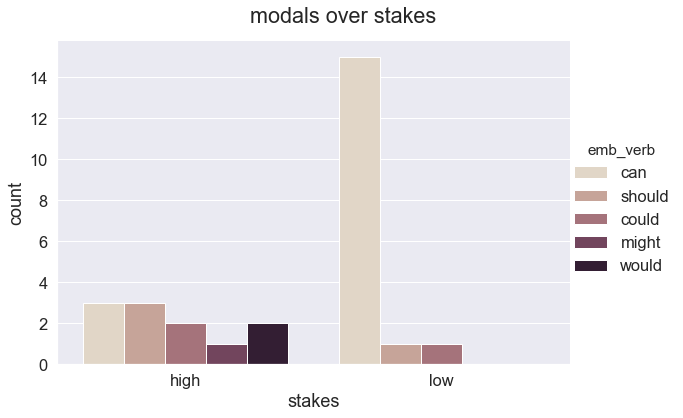

In [482]:
# Embedded modals
# fig_dims = (10, 8)
# fig, ax = plt.subplots(figsize=fig_dims)
g = sns.catplot(x="stakes", kind="count", hue="emb_verb", palette="ch:.25", height=6, aspect=8/6, data=modal)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('modals over stakes')
plt.show()
# g.savefig('myfile.pdf')

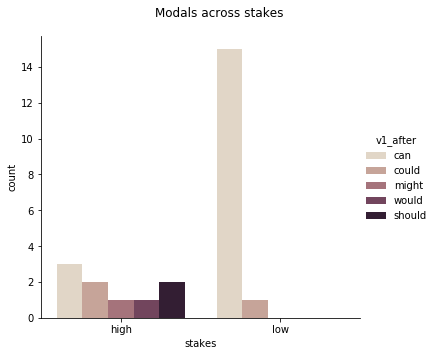

In [22]:
# Embedded modals in KNOW
g = sns.catplot(x="stakes", kind="count", hue="v1_after", palette="ch:.25", data=modal)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Modals across stakes')
plt.show()

In [260]:
mod = modal.pivot_table(index=['stakes', 'wh', 'emb_verb'], values='sentence', aggfunc=len).groupby(['stakes', 'wh']).sentence.transform(lambda x: x/sum(x))


NameError: name 'modal' is not defined

In [27]:
modal.head()

,Unnamed: 0,subject,Nat_lang,factors,sentence,trial,stakes,story,wh,clauseType,phrase,questType,heuristic,v_before,v1_after,v2_after,v3_after,wh_v1,mat_verb,emb_verb
61,138,17617,English,test-high-oyster-where,Who can find me a list of the restaurants that...,test,high,oyster,who,Modal,,Root Question,?,,can,find,were,"[[Who, WP], [can, MD]]",None,can
315,830,12.0,na,test-high-protest-where,Where could they be held?,test,high,protest,where,Modal,,Root Question,?,,could,be,held,"[[Where, WRB], [could, MD]]",None,could
321,836,18.0,na,test-high-protest-where,Where might they have taken the protesters?,test,high,protest,where,Modal,,Root Question,?,,might,have,taken,"[[Where, WRB], [might, MD]]",None,might
338,857,17671,English,test-high-protest-where,Where would they keep them?,test,high,protest,where,Modal,,Root Question,?,,would,keep,,"[[Where, WRB], [would, MD]]",None,would
354,953,18.0,na,test-low-coffee-where,Where can i drink espresso around here?,test,low,coffee,where,Modal,,Root Question,?,,can,i,drink,"[[Where, WRB], [can, MD]]",None,can
